In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import RandomOverSampler, SMOTE

#Load Dataset
dataset_path = kagglehub.dataset_download("nikhil1e9/Loan-default")
df = pd.read_csv(f"{dataset_path}/loan_default.csv")
df.head()



,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [2]:
# Exploratory Data Analysis
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [3]:
df.isnull().sum()



LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [4]:
df[df.duplicated()]


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default


In [5]:
df.describe()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


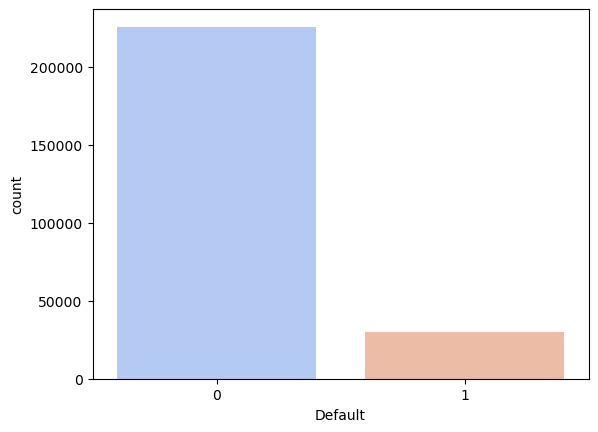

In [6]:
sns.countplot(x = 'Default', data =df, palette = 'coolwarm')
plt.show()



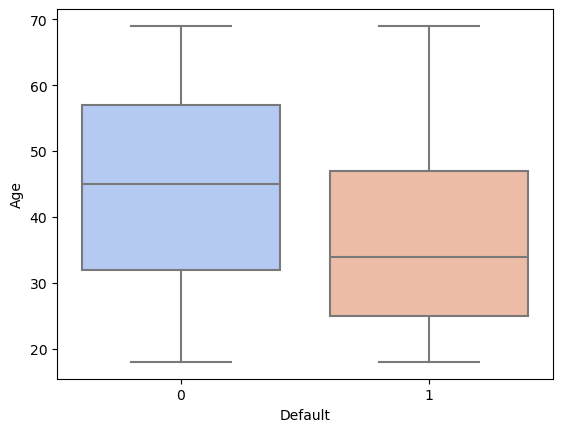

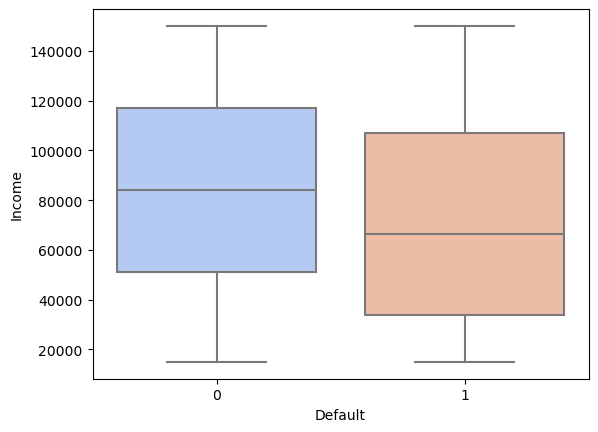

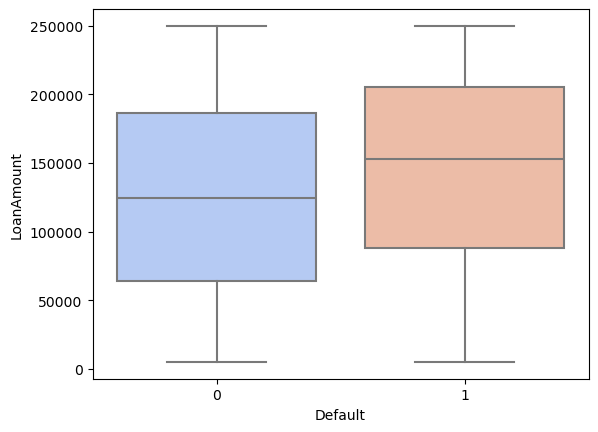

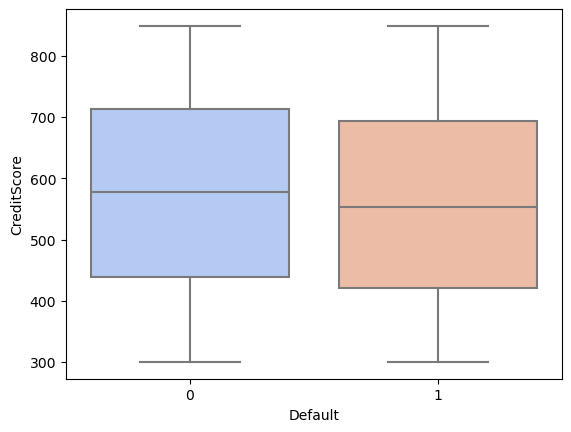

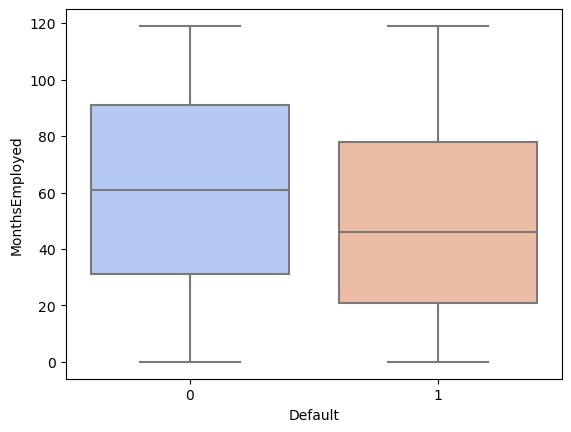

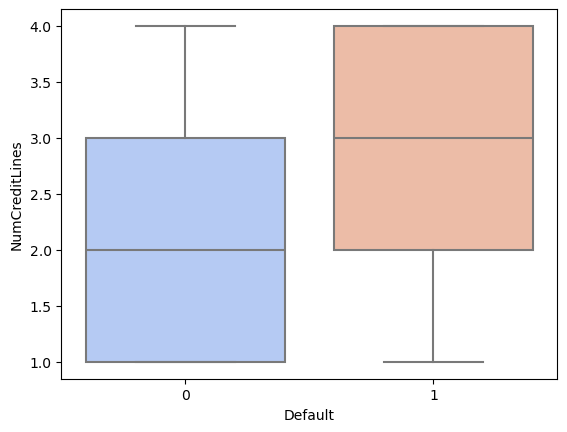

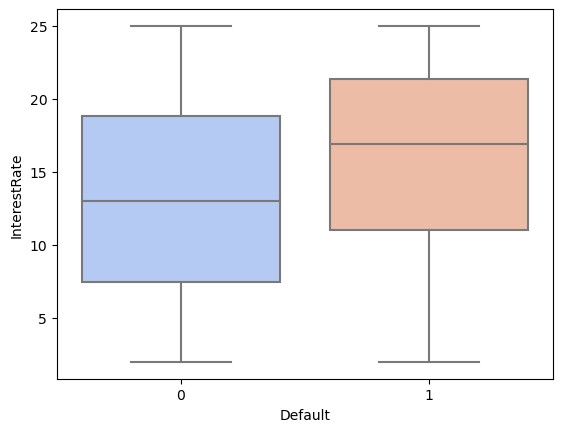

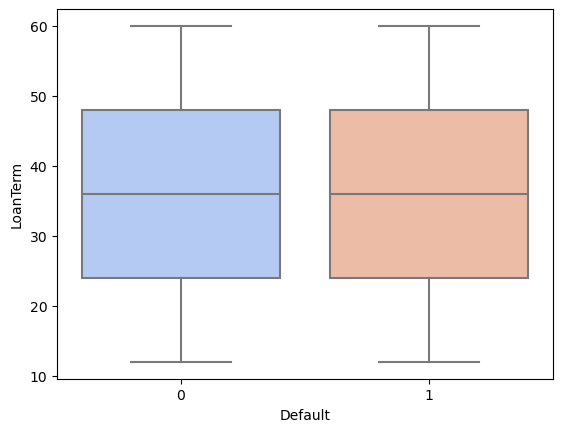

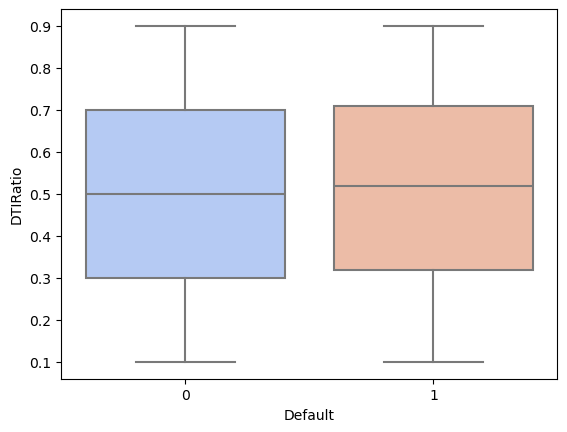

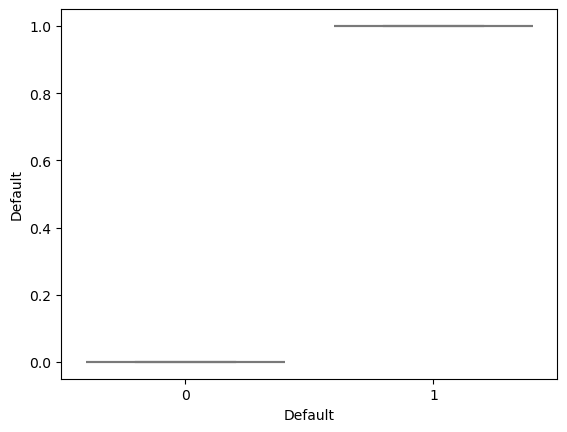

In [7]:
# Numerical Features Analysis
df_num = df.select_dtypes(exclude = ['object'])
for col in df_num:
    sns.boxplot(x = 'Default' , y = df[col], data =df , palette = 'coolwarm')
    plt.show()



In [8]:
# get correlation matrix
corr_matrix = df_num.corr()
corr_matrix



,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


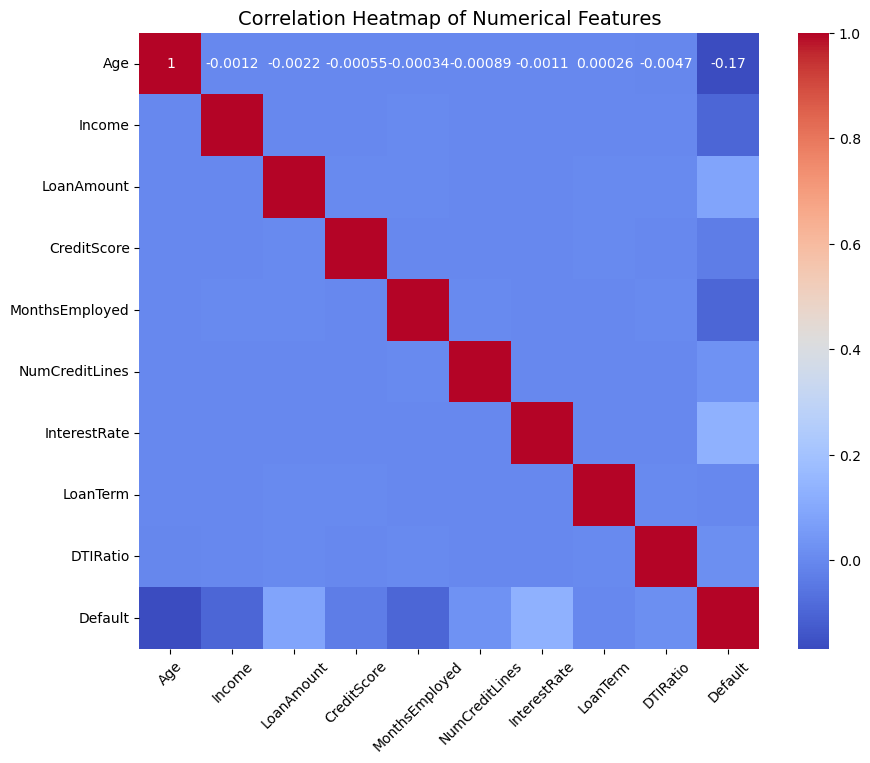

In [9]:
# Correlation Analysis
plt.figure(figsize=(10, 8))  
plt.title('correlation among numerical features in the cereal data')
sns.heatmap(data=corr_matrix, annot = True, cmap = 'coolwarm', cbar = True);
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45, fontsize=10)  # Rotate labels for better visibility
plt.yticks(fontsize=10)
plt.show()



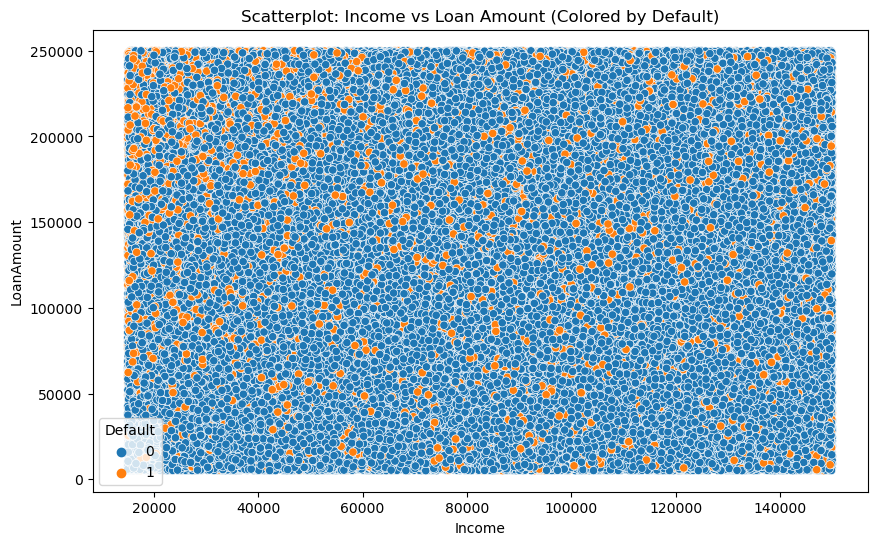

In [10]:
# Scatterplot Analysis
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.scatterplot(x='Income', y='LoanAmount', data=df, hue='Default')
plt.title("Scatterplot: Income vs Loan Amount (Colored by Default)")
plt.show()

In [11]:
# dropping Loan ID
df.drop('LoanID', axis = 1 , inplace = True)
df.head()


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [12]:
# Feature Engineering
onehot_cols = ["EmploymentType", "MaritalStatus", "LoanPurpose", "Education", "HasMortgage", "HasDependents", "HasCoSigner"]
enc = OneHotEncoder(sparse_output=False, drop="first")  # Avoid dummy variable trap

encoded_data = enc.fit_transform(df[onehot_cols])
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out())

# Drop original columns and add new encoded ones
df = df.drop(columns=onehot_cols).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Education_High School,Education_Master's,Education_PhD,HasMortgage_Yes,HasDependents_Yes,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
df.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other', 'Education_High School',
       'Education_Master's', 'Education_PhD', 'HasMortgage_Yes',
       'HasDependents_Yes', 'HasCoSigner_Yes'],
      dtype='object')

In [14]:
# Define Features & Target
X = df.drop('Default', axis = 1)
y = df['Default']



In [15]:
# Handle Class Imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="Default")], axis=1)
df_resampled.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,EmploymentType_Part-time,...,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Education_High School,Education_Master's,Education_PhD,HasMortgage_Yes,HasDependents_Yes,HasCoSigner_Yes,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,46,84208,129188,451,26,3,21.17,24,0.31,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [16]:
# Standard Scaling
target_col = "Default"
feature_cols = [col for col in df_resampled.columns if col != target_col]
scaler = StandardScaler()
df_resampled[feature_cols] = scaler.fit_transform(df_resampled[feature_cols])
df_resampled.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,EmploymentType_Part-time,...,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,Education_High School,Education_Master's,Education_PhD,HasMortgage_Yes,HasDependents_Yes,HasCoSigner_Yes,Default
0,1.122195,0.202448,-1.192511,-0.321744,0.767502,1.552973,0.112665,0.007306,-0.308274,-0.632218,...,-0.543638,-0.521207,2.159743,-0.647248,-0.609841,-0.60285,1.112159,1.127620,1.132249,0
1,2.049219,-0.683934,-0.148217,-0.742789,-1.252748,-1.319021,-1.580672,1.535483,0.818957,-0.632218,...,-0.543638,-0.521207,2.159743,-0.647248,1.907741,-0.60285,-1.050957,-1.036715,1.132249,0
2,0.409100,0.157932,-0.081079,-0.790326,-0.910859,0.595642,1.077964,-0.756782,-0.918857,-0.632218,...,-0.543638,-0.521207,-0.541889,-0.647248,1.907741,-0.60285,1.112159,1.127620,-1.030773,1
3,-0.589233,-1.150504,-1.274354,1.192657,-1.718959,0.595642,-1.213403,-0.756782,-1.294600,-0.632218,...,-0.543638,-0.521207,-0.541889,1.818865,-0.609841,-0.60285,-1.050957,-1.036715,-1.030773,0
4,1.407434,-1.431558,-1.778593,0.445643,-1.470313,1.552973,-1.304408,0.771395,1.053797,-0.632218,...,-0.543638,-0.521207,-0.541889,-0.647248,-0.609841,-0.60285,-1.050957,1.127620,-1.030773,0


In [17]:

# Print Class Distribution Before & After Resampling
print("Before Resampling:\n", y.value_counts())
print("\nAfter Resampling:\n", y_resampled.value_counts())


Before Resampling:
 Default
0    225694
1     29653
Name: count, dtype: int64

After Resampling:
 Default
0    225694
1    225694
Name: count, dtype: int64


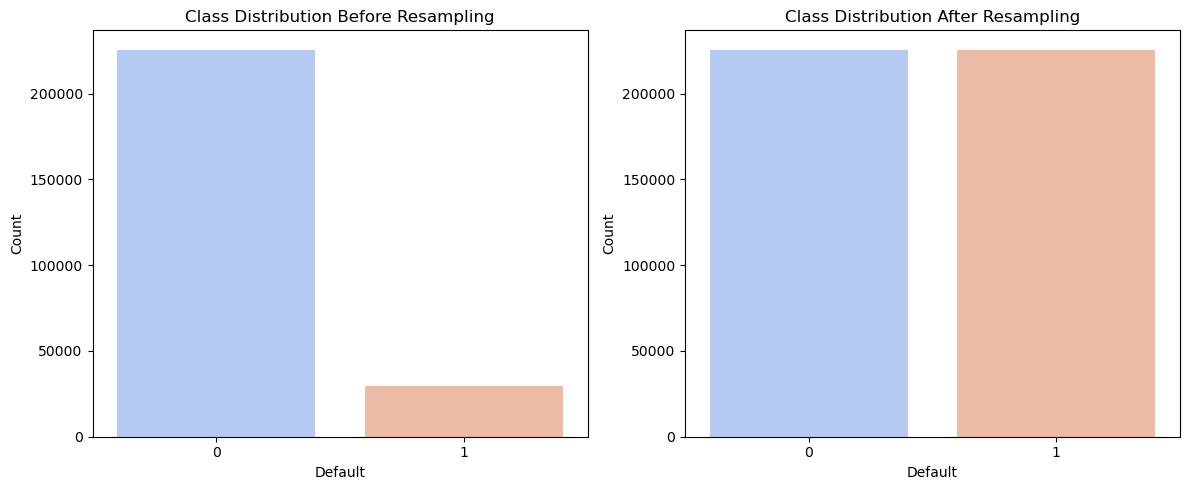

In [18]:
# Visualizing Class Distribution Before & After Resampling
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before resampling
sns.countplot(x=y, ax=axes[0], palette="coolwarm")
axes[0].set_title("Class Distribution Before Resampling")
axes[0].set_xlabel("Default")
axes[0].set_ylabel("Count")

# After resampling
sns.countplot(x=y_resampled, ax=axes[1], palette="coolwarm")
axes[1].set_title("Class Distribution After Resampling")
axes[1].set_xlabel("Default")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [19]:
# Train-Test Split (Using Resampled & Scaled Data)
X_final = df_resampled.drop(columns=["Default"])
y_final = df_resampled["Default"]

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (361110, 24)
Testing set size: (90278, 24)


In [20]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Logistic Regression Model
log_reg = LogisticRegression(solver='liblinear', random_state=42)
cv_scores = cross_val_score(log_reg, X_final, y_final, cv=kfold, scoring="roc_auc")

# Print the cross-validation scores
print("Cross-Validation AUC-ROC Scores:", cv_scores)
print(f"Mean AUC-ROC Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

Cross-Validation AUC-ROC Scores: [0.76696728 0.77168489 0.76739257 0.77174666 0.77086496]
Mean AUC-ROC Score: 0.7697 (±0.0021)


In [21]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, FN, FP, TN
TN, FP, FN, TP = conf_matrix.ravel()

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Print TP, TN, FP, FN values
print(f"True Positives (TP): {TP}")
print(f"False Negatives (FN): {FN}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")

Accuracy: 0.7034
Precision: 0.6960
Recall: 0.7223
AUC-ROC Score: 0.7702
Confusion Matrix:
 [[30900 14239]
 [12533 32606]]
True Positives (TP): 32606
False Negatives (FN): 12533
False Positives (FP): 14239
True Negatives (TN): 30900


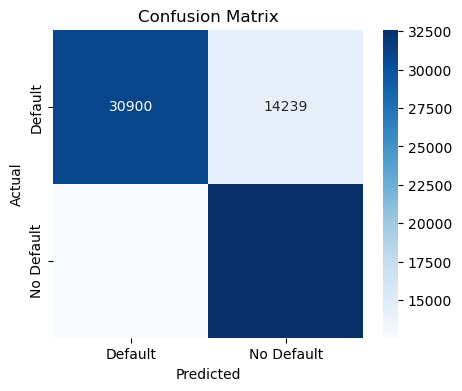

In [22]:
# Visualizing Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Default", "No Default"], yticklabels=["Default", "No Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

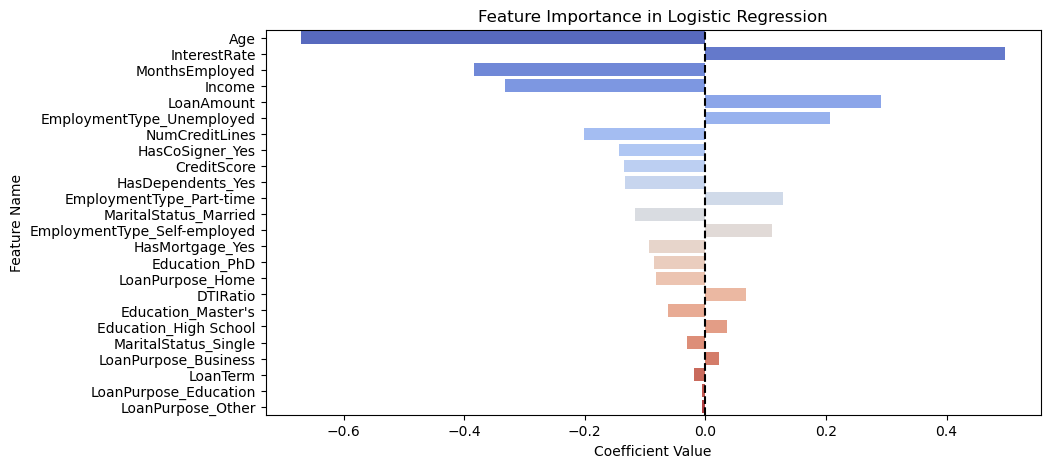

In [23]:
# Feature Importance
feature_importance = pd.DataFrame({"Feature": X_train.columns, "Coefficient": log_reg.coef_[0]})
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Coefficient", y="Feature", data=feature_importance, palette="coolwarm")
plt.axvline(x=0, color="black", linestyle="--")
plt.title("Feature Importance in Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.show()

In [24]:
# Hyperparameter Tuning (Grid Search)
param_grid = {
    "penalty": ["l1", "l2"],  
    "C": [0.01, 0.1, 1, 10],  
    "solver": ["liblinear"]
}

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=5000), param_grid, cv=5, scoring="roc_auc", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Best AUC-ROC Score from Grid Search: {grid_search.best_score_:.4f}")


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best AUC-ROC Score from Grid Search: 0.7696


In [25]:
# Final Model Evaluation
best_model.fit(X_train, y_train)
y_best_proba = best_model.predict_proba(X_test)[:, 1]
best_auc = roc_auc_score(y_test, y_best_proba)

print(f"Final Test AUC-ROC Score: {best_auc:.4f}")


Final Test AUC-ROC Score: 0.7702


Performance Comparison of L1, L2, and ElasticNet Regularization:
           L1 (Lasso)  L2 (Ridge)  ElasticNet
Accuracy     0.703460    0.703449    0.703460
Precision    0.696055    0.696040    0.696055
Recall       0.722347    0.722347    0.722347
AUC-ROC      0.770158    0.770159    0.770159


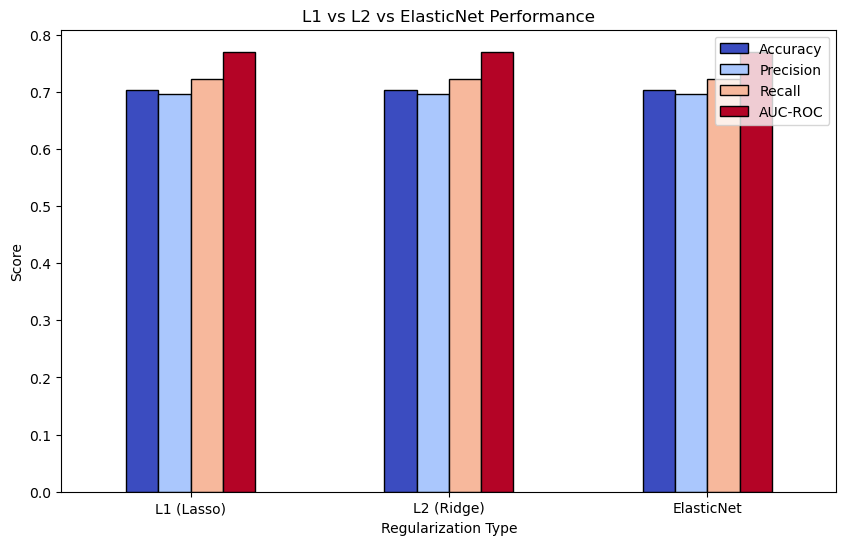

In [26]:


# Define the models with different regularizations
models = {
    "L1 (Lasso)": LogisticRegression(penalty="l1", solver="liblinear", random_state=42),
    "L2 (Ridge)": LogisticRegression(penalty="l2", solver="liblinear", random_state=42),
    "ElasticNet": LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5, random_state=42)
}

# Store performance metrics
performance = {}

# Train and Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Compute Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Store in performance dictionary
    performance[name] = [accuracy, precision, recall, auc_roc]

# Convert Performance Dictionary to DataFrame for Visualization
performance_df = pd.DataFrame(performance, index=["Accuracy", "Precision", "Recall", "AUC-ROC"])

# Display Performance Metrics
print("Performance Comparison of L1, L2, and ElasticNet Regularization:")
print(performance_df)

# Plot the Performance Comparison
performance_df.T.plot(kind="bar", figsize=(10, 6), colormap="coolwarm", edgecolor="black")
plt.title("L1 vs L2 vs ElasticNet Performance")
plt.xlabel("Regularization Type")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.show()


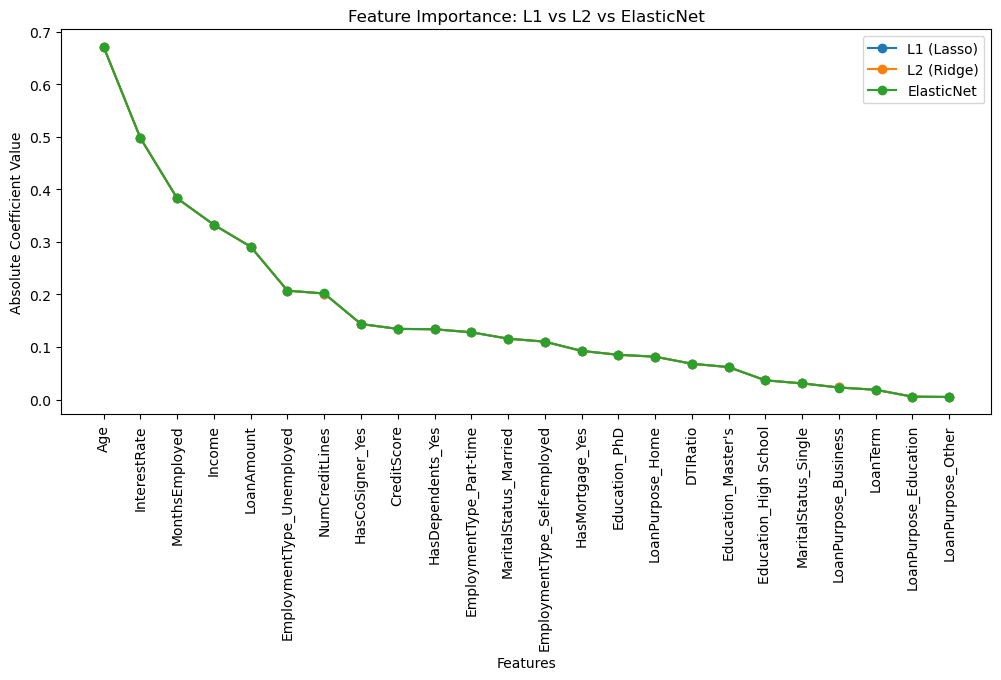

In [27]:
plt.figure(figsize=(12, 5))
for name, model in models.items():
    coef_values = model.coef_[0]
    feature_importance = pd.DataFrame({"Feature": X_train.columns, "Coefficient": coef_values})
    feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
    feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

    plt.plot(feature_importance["Feature"], feature_importance["Abs_Coefficient"], label=name, marker='o')

plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Absolute Coefficient Value")
plt.title("Feature Importance: L1 vs L2 vs ElasticNet")
plt.legend()
plt.show()


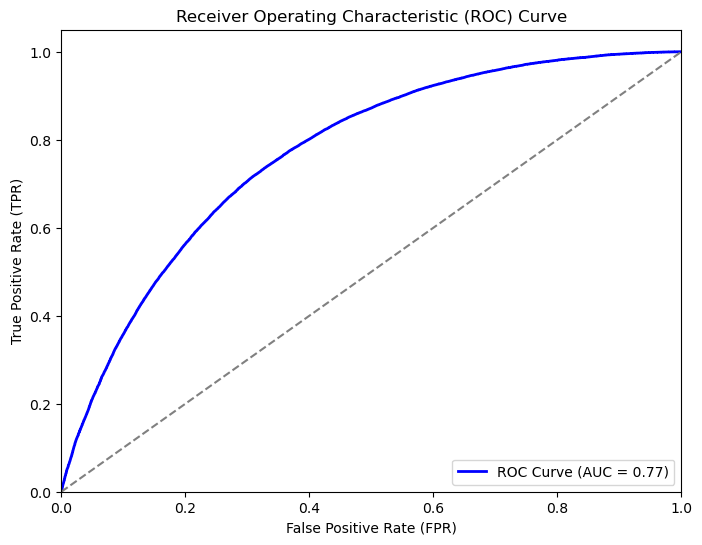

In [28]:
from sklearn.metrics import roc_curve, auc

# Compute TPR & FPR
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


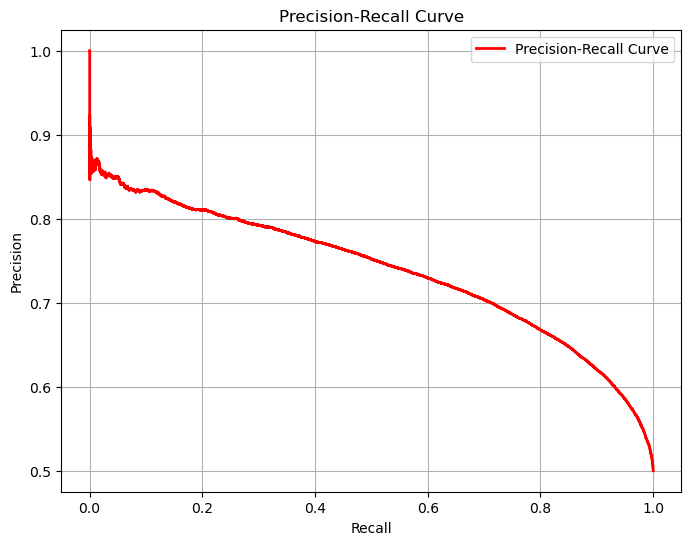

In [29]:
from sklearn.metrics import precision_recall_curve

# Compute Precision & Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="red", lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()


L1 (Lasso) Cross-Validation AUC-ROC Scores: [0.76696755 0.77168488 0.76739235 0.77174653 0.77086474]
L1 (Lasso) Mean AUC-ROC Score: 0.7697 (±0.0021)
L2 (Ridge) Cross-Validation AUC-ROC Scores: [0.76696728 0.77168489 0.76739257 0.77174666 0.77086496]
L2 (Ridge) Mean AUC-ROC Score: 0.7697 (±0.0021)
ElasticNet Cross-Validation AUC-ROC Scores: [0.76696712 0.77168494 0.76739276 0.77174661 0.77086501]
ElasticNet Mean AUC-ROC Score: 0.7697 (±0.0021)


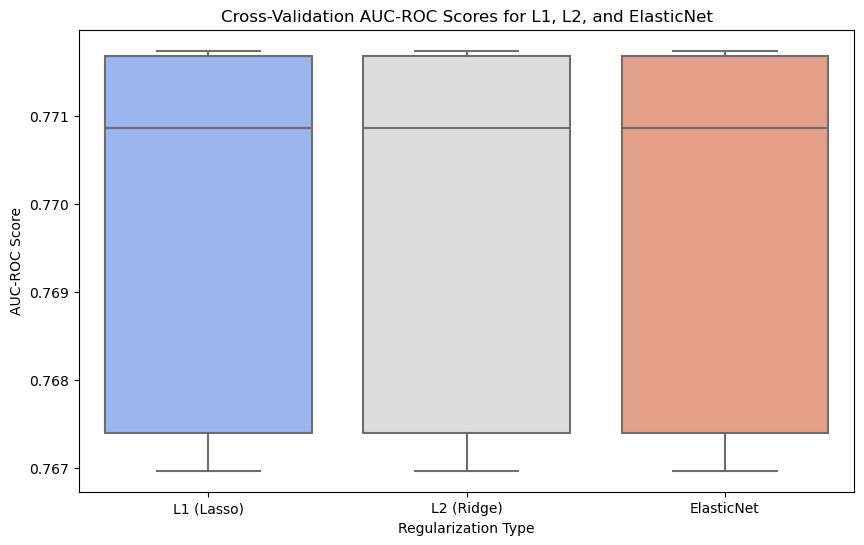

In [30]:


# Perform Cross-Validation for Regularized Models
models = {
    "L1 (Lasso)": LogisticRegression(penalty="l1", solver="liblinear", random_state=42),
    "L2 (Ridge)": LogisticRegression(penalty="l2", solver="liblinear", random_state=42),
    "ElasticNet": LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.5, random_state=42)
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_final, y_final, cv=kfold, scoring="roc_auc")
    print(f"{name} Cross-Validation AUC-ROC Scores:", cv_scores)
    print(f"{name} Mean AUC-ROC Score: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Step 4: Visualize Cross-Validation Results
cv_results = {
    "L1 (Lasso)": cross_val_score(models["L1 (Lasso)"], X_final, y_final, cv=kfold, scoring="roc_auc"),
    "L2 (Ridge)": cross_val_score(models["L2 (Ridge)"], X_final, y_final, cv=kfold, scoring="roc_auc"),
    "ElasticNet": cross_val_score(models["ElasticNet"], X_final, y_final, cv=kfold, scoring="roc_auc")
}

cv_results_df = pd.DataFrame(cv_results)
plt.figure(figsize=(10, 6))
sns.boxplot(data=cv_results_df, palette="coolwarm")
plt.title("Cross-Validation AUC-ROC Scores for L1, L2, and ElasticNet")
plt.xlabel("Regularization Type")
plt.ylabel("AUC-ROC Score")
plt.show()


In [31]:
# Re-load necessary libraries since the execution state was reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, log_loss


# Logistic Regression Model with Statsmodels
X_train_sm = sm.add_constant(X_train)  # Add intercept
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
result.summary()

# Print Statsmodels Summary and Log Loss
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.572775
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               361110
Model:                          Logit   Df Residuals:                   361085
Method:                           MLE   Df Model:                           24
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                  0.1737
Time:                        10:17:19   Log-Likelihood:            -2.0683e+05
converged:                       True   LL-Null:                   -2.5030e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0205      0.004     -5.441      0.000

Accuracy: 0.8635

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85     45139
           1       0.80      0.97      0.88     45139

    accuracy                           0.86     90278
   macro avg       0.88      0.86      0.86     90278
weighted avg       0.88      0.86      0.86     90278



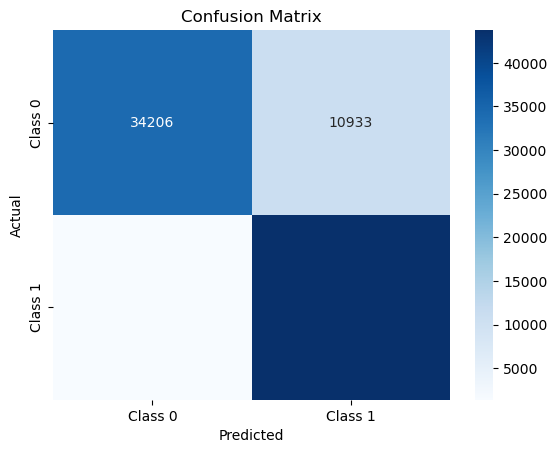

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # k=5 (default)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
